# Setup

In [1]:
# download sample catalog
!wget https://raw.githubusercontent.com/LSSTDESC/BlendingToolKit/main/data/sample_input_catalog.fits

--2022-06-15 17:46:07--  https://raw.githubusercontent.com/LSSTDESC/BlendingToolKit/main/data/sample_input_catalog.fits
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25920 (25K) [application/octet-stream]
Saving to: ‘sample_input_catalog.fits.1’

sample_input_catalo 100%[===================>]  25.31K  --.-KB/s    in 0.001s  

2022-06-15 17:46:07 (32.5 MB/s) - ‘sample_input_catalog.fits.1’ saved [25920/25920]



In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

import btk
import btk.plot_utils
import btk.survey
import btk.draw_blends
import btk.catalog
import btk.sampling_functions
import astropy.table

# Draw some blends

We will first explore the image generation part of BTK. We need to provide 3 main elements: the catalog, a sampling function and a survey.

## Catalog

BTK uses a wrapper class for the actual catalog object, to get a standardized input for the generator. Currently BTK supports two kind of catalogs: Catsim-like catalogs and the COSMOS catalog (as provided with Galsim). Both have their own implementation of the `Catalog` class; we will only use the Catsim one here. You can easily import the catalog from a FITS file using the `from_file` method as demonstrated here with our example catalog.

In [3]:
catalog_name = "sample_input_catalog.fits"
catalog = btk.catalog.CatsimCatalog.from_file(catalog_name)

It is also possible to instantiate the class by giving it the catalog directly; the `from_file` method is merely a shortcut.

In [4]:
_, ext = os.path.splitext(catalog_name)
fmt = "fits" if ext.lower() == ".fits" else "ascii.basic"
raw_catalog = astropy.table.Table.read(catalog_name, format=fmt)
catalog = btk.catalog.CatsimCatalog(raw_catalog)

When the Catalog object is created, it creates internally a `table` attribute containing a modified table from the input, which will be used in the rest of the code.

In [5]:
catalog.table

galtileid,ra,dec,redshift,fluxnorm_bulge,fluxnorm_disk,fluxnorm_agn,a_b,a_d,b_b,b_d,pa_bulge,pa_disk,u_ab,g_ab,r_ab,i_ab,z_ab,y_ab,ref_mag,btk_size
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2200871446,1505.9509277292,-0.5342399817876,0.496377289295,0.0,1.4144730572e-17,0.0,0.0,0.278649687767,0.0,0.221303001046,0.0,307.344329834,25.9418621063,25.129743576,23.9588813782,23.3607368469,23.0723800659,22.9095973969,23.3607368469,1.29850754499422
2205921112,1512.1024131744,-3.609359823168,1.89508104324,0.0,1.91501907101e-18,0.0,0.0,0.358063697815,0.0,0.313674807549,0.0,137.791702271,25.848903656,25.867565155,25.9179477692,25.9851398468,25.8779563904,25.7642536163,25.9851398468,1.6685768318179002
2205010878,1524.3564605652,-11.266919877384,1.93795013428,0.0,2.15612608955e-18,0.0,0.0,0.444279909134,0.0,0.424689114094,0.0,233.972427368,25.5657653809,25.5659580231,25.6165962219,25.6957893372,25.6281528473,25.5399188995,25.6957893372,2.07034437656444
2208734677,1515.910291668,-0.26135999942183996,1.16251754761,0.0,1.74001598433e-18,0.0,0.0,0.312852591276,0.0,0.180962398648,0.0,217.517120361,27.3159255981,27.4167633057,27.051820755,26.6737632751,25.9380722046,25.6458129883,26.6737632751,1.45789307534616
2212241881,1523.4518051136,-7.851959858088,1.35479903221,0.0,1.11031595423e-18,0.0,0.0,0.414316505194,0.0,0.205554202199,0.0,226.523849487,27.3325939178,27.4470024109,27.3282527924,27.0680370331,26.7419490814,26.1817016602,27.0680370331,1.93071491420404
2204477290,1521.3000297564001,-2.1744000026964,1.33114361763,0.0,5.75775484903e-18,0.0,0.0,0.351797997952,0.0,0.126827403903,0.0,53.955165863,25.6527175903,25.7753200531,25.4755821228,25.2793464661,24.9572029114,24.4631252289,25.2793464661,1.63937867045632
2201104165,1519.5791244492,-5.784840043632,0.812159895897,6.57883086866e-18,2.26453001134e-17,0.0,0.22702370584,0.191140606999,0.20540009439,0.0433686003089,24.3779182434,24.3779182434,25.9493045807,25.4186573029,24.5099773407,23.527223587,23.0481529236,22.813867569,23.527223587,0.7996899312496969
2211831084,1520.2035427032,-8.715239726004,1.52316868305,0.0,1.06012697736e-18,0.0,0.0,0.216705903411,0.0,0.123286098242,0.0,13.71824646,27.2072696686,27.268491745,27.2910671234,27.0573310852,26.8970832825,26.4211711884,27.0573310852,1.00984950989526
2213920571,1543.3387756308,-33.612481132164,1.01047706604,0.0,2.24895700248e-19,0.0,0.0,0.229738906026,0.0,0.175429001451,0.0,281.466491699,26.6581230164,26.9268531799,27.170211792,27.3262882233,27.3432483673,27.5143566132,27.3262882233,1.07058330208116


## Sampling function

The sampling function is an object which is used to determine the informations about the blends, eg which galaxies are drawn, with what shifts, ... This is achieved using the `SamplingFunction` class, which is callable like a function, taking as argument the `Catalog.table` and returning modified selected entries corresponding to the galaxies being drawn. 

For this tutorial, we will use the default sampling function, which can be instantiated like this:

In [6]:
stamp_size = 24.0  # Size of the stamp, in arcseconds
max_number = 3     # Maximum number of galaxies in a blend
max_shift = 3.0    # Maximum shift of the galaxies, in arcseconds
sampling_function = btk.sampling_functions.DefaultSampling(max_number=max_number, stamp_size=stamp_size, maxshift=max_shift)

This function chooses random galaxies (after applying a magnitude cut), computes random shifts for the galaxies and returns the entries from the table, adding two columns corresponding to the shifts.

### Exercise: Understanding the sampling function

For this exercise we will understand sampling functions in BTK a bit better by writing simplest possible sampling function together. 

In [7]:
# Here is a template. 
# You can ignore the first two methods which are boiler-plate.

class SimpleSampling(btk.sampling_functions.SamplingFunction):
    """Default sampling function used for producing blend tables."""

    def __init__(self, max_number=2, stamp_size=24.0):
        """
        Args:
            max_number (int): Defined in parent class
            stamp_size (float): Size of the desired stamp in arcseconds.
        """
        super().__init__(max_number)
        self.stamp_size = stamp_size

    @property
    def compatible_catalogs(self):
        return ("CatsimCatalog", )

    def __call__(self, table):
        # (1) First, we need to determine the # of objects in the blend.
        # TODO: set n_sources to a random number between 1 and self.max_number.

        # (2) Some of the objects in the catalog might be too dim, so let's 
        # apply a magnitude cut.

        # TODO: Apply a magnitude cut of 25.3 on table via the `ref_mag` column.

        # (3) Extract a random set of `n_sources` galaxies from the filtered table.
        # as a subset of this table. 

        # TODO: Select `n_sources` random indices between (0, len(my_table)-1) and slice.
        # set this to `blend_table`


        # (4) Our `blend_table` is not ready yet, we need to set the 'ra', 'dec' entries 
        # to be sensible values with respect to the center of the postage stamp we are 
        # drawing with this blend (0, 0).

        # TODO: Create 2 vectors (x,y) of size `n_sources` containing (random) reasonable values
        # for the positions of the sources relative to postage stamp center in arcseconds. The objects' centers
        # should always lie inside the postage stamp. 


        # TODO: Finally set the 'ra', 'dec' columns of `blend_table` to the new 
        # values you calculated.
        
        return blend_table

Now we will apply your sampling function to our catalog to check if it works. (**NOTE:** BTK does this for your automatically if your sampling function is constructed correctly. )

In [8]:
# first, we extract astropy table from the catalog object. 
table = catalog.table

In [9]:
# take a look at the summary of the table.
table

galtileid,ra,dec,redshift,fluxnorm_bulge,fluxnorm_disk,fluxnorm_agn,a_b,a_d,b_b,b_d,pa_bulge,pa_disk,u_ab,g_ab,r_ab,i_ab,z_ab,y_ab,ref_mag,btk_size
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2200871446,1505.9509277292,-0.5342399817876,0.496377289295,0.0,1.4144730572e-17,0.0,0.0,0.278649687767,0.0,0.221303001046,0.0,307.344329834,25.9418621063,25.129743576,23.9588813782,23.3607368469,23.0723800659,22.9095973969,23.3607368469,1.29850754499422
2205921112,1512.1024131744,-3.609359823168,1.89508104324,0.0,1.91501907101e-18,0.0,0.0,0.358063697815,0.0,0.313674807549,0.0,137.791702271,25.848903656,25.867565155,25.9179477692,25.9851398468,25.8779563904,25.7642536163,25.9851398468,1.6685768318179002
2205010878,1524.3564605652,-11.266919877384,1.93795013428,0.0,2.15612608955e-18,0.0,0.0,0.444279909134,0.0,0.424689114094,0.0,233.972427368,25.5657653809,25.5659580231,25.6165962219,25.6957893372,25.6281528473,25.5399188995,25.6957893372,2.07034437656444
2208734677,1515.910291668,-0.26135999942183996,1.16251754761,0.0,1.74001598433e-18,0.0,0.0,0.312852591276,0.0,0.180962398648,0.0,217.517120361,27.3159255981,27.4167633057,27.051820755,26.6737632751,25.9380722046,25.6458129883,26.6737632751,1.45789307534616
2212241881,1523.4518051136,-7.851959858088,1.35479903221,0.0,1.11031595423e-18,0.0,0.0,0.414316505194,0.0,0.205554202199,0.0,226.523849487,27.3325939178,27.4470024109,27.3282527924,27.0680370331,26.7419490814,26.1817016602,27.0680370331,1.93071491420404
2204477290,1521.3000297564001,-2.1744000026964,1.33114361763,0.0,5.75775484903e-18,0.0,0.0,0.351797997952,0.0,0.126827403903,0.0,53.955165863,25.6527175903,25.7753200531,25.4755821228,25.2793464661,24.9572029114,24.4631252289,25.2793464661,1.63937867045632
2201104165,1519.5791244492,-5.784840043632,0.812159895897,6.57883086866e-18,2.26453001134e-17,0.0,0.22702370584,0.191140606999,0.20540009439,0.0433686003089,24.3779182434,24.3779182434,25.9493045807,25.4186573029,24.5099773407,23.527223587,23.0481529236,22.813867569,23.527223587,0.7996899312496969
2211831084,1520.2035427032,-8.715239726004,1.52316868305,0.0,1.06012697736e-18,0.0,0.0,0.216705903411,0.0,0.123286098242,0.0,13.71824646,27.2072696686,27.268491745,27.2910671234,27.0573310852,26.8970832825,26.4211711884,27.0573310852,1.00984950989526
2213920571,1543.3387756308,-33.612481132164,1.01047706604,0.0,2.24895700248e-19,0.0,0.0,0.229738906026,0.0,0.175429001451,0.0,281.466491699,26.6581230164,26.9268531799,27.170211792,27.3262882233,27.3432483673,27.5143566132,27.3262882233,1.07058330208116


In [10]:
# TODO: Create and apply the sampling function you just wrote above to the
# `table`, what happens if you run this cell multiple times?

You might want to write more complex sampling functions to have more control over how the galaxies are drawn; there are some other examples in the [sampling_functions.py](https://github.com/LSSTDESC/BlendingToolKit/blob/main/btk/sampling_functions.py) file. Please also take a look at the [custom-tutorial.ipynb](https://github.com/LSSTDESC/BlendingToolKit/blob/main/notebooks/02b-custom-tutorial.ipynb) notebook, which will show what to do in more detail.

## Survey

The BTK `Survey` object defines the observing conditions relative to a survey. It is a light wrapper around the `Survey` class in `galcheat`. Read more about `galcheat` [here](https://aboucaud.github.io/galcheat/index.html). 

Basically, it's a class containing different attributes for survey properties like pixel scale and effective area, etc. Let's check them out: 


In [11]:
lsst = btk.survey.get_surveys("LSST")

In [12]:
lsst.pixel_scale, lsst.effective_area

(<Quantity 0.2 arcsec>, <Quantity 33.34241483 m2>)

Note that these are `astropy.Quantity` objects that have associated units. To get only the value you can do e.g.

In [13]:
print(lsst.effective_area.to_value('m2'))
print(lsst.effective_area.to_value('cm2')) # other compatible units

33.342414830068996
333424.14830068994


You can modify them: 

In [14]:
lsst.pixel_scale = 0.3
lsst.pixel_scale

0.3

Rerunning `xx = btk.survey.get_surveys(XX)` gives you a fresh copy.

In [15]:
lsst = btk.survey.get_surveys("LSST")
lsst.pixel_scale

<Quantity 0.2 arcsec>

The `Survey` object like `lsst` above also contains a list of `filters`, which corresponds to each of the filters available for that survey. 

In [16]:
lsst.available_filters

['u', 'g', 'r', 'i', 'z', 'y']

You can access them via:

In [17]:
r = lsst.get_filter('r')

The attributes of the filter include things like `sky_brightness` and `full_exposure_time` for a detailed description see [here](https://aboucaud.github.io/galcheat/parameters.html#filter-parameters). The `Filter` object works analogously to the `Survey` object. 

In [18]:
r.psf_fwhm

<Quantity 0.81 arcsec>

Most attributes should be pretty straightforward to modify; please take a look at the [API](https://lsstdesc.org/BlendingToolKit/src/btk.survey.html) for a description of the attributes. The [custom tutorial](https://github.com/LSSTDESC/BlendingToolKit/blob/main/notebooks/02b-custom-tutorial.ipynb) also provides descriptions of the attributes and more information on how to customize surveys.

Finally, note that `get_filter` returns a view ofo the `Filter` object not a copy: modifications made to the `Filter` objects stay unless you create a fresh `Survey` object

In [ ]:
r.psf_fwhm = r.psf_fwhm / 2
r = lsst.get_filter('r')
r.psf_fwhm

The `psf` attribute deserves an additionnal explanation: it corresponds to the PSF for each filter. It can be provided either directly as a Galsim model e.g. `galsim.Kolmogorov(fwhm=1.5)` or as a function returning a Galsim model, for randomization purposes.

If we look at the psf for our `r` filter above, we see that it's a galsim object. This is the default PSF in BTK which includes a atmospheric `Kolmogorov` component and `Airy` function for the optical part.

In [ ]:
r.psf

## Drawing the blends

Now that we have all the objects at our disposal, we can create the DrawBlendsGenerator. This object is a python generator, meaning it can be called with `next(generator)` to generate a new batch. It is again declined for Catsim and COSMOS, and we will use the Catsim one here. We suggest you refer to the [documentation](https://lsstdesc.org/BlendingToolKit/src/btk.draw_blends.html) for information on the additionnal parameters here.

In [19]:
draw_generator = btk.draw_blends.CatsimGenerator(
    catalog,
    sampling_function,
    lsst,
    batch_size=100,
    stamp_size=stamp_size,
    cpus=1,
    add_noise='all',
)

The results from the `next` call are stored in the dictionnary; the keys are:
- `blend_images` for the actual images (as a (batch_size,stamp_size,stamp_size,len(survey.filters))-sized numpy array )
- `isolated_images` for the isolated images (as a (batch_size,sampling_function.max_number,stamp_size,stamp_size,len(survey.filters))-sized numpy array )
- `blend_list` for the blend information (as a list of astropy tables corresponding to the output of the sampling function for each blend)
- `psf` for the PSF (as a list of Galsim objects)
- `wcs` for the World Coordinate System corresponding to the images (as a list of astropy.wcs.WCS objects)

Please note that several surveys can be provided as a list to the generator. In that case, each of the entry will contain a dictionnary indexed by the surveys, which in turn contains the results described as above (you would access it with `batch['blend_images']['LSST']` for instance.

In [20]:
# here is an utility function you can use to plot blends.
def plot_blends(draw_generator, n_blends=5):
  batch = next(draw_generator)
  blend_images = batch['blend_images']
  blend_list = batch['blend_list']
  btk.plot_utils.plot_blends(blend_images[:n_blends], blend_list[:n_blends], limits=(30,90))

Generating blends for LSST survey:   0%|          | 0/100 [00:00<?, ?it/s]

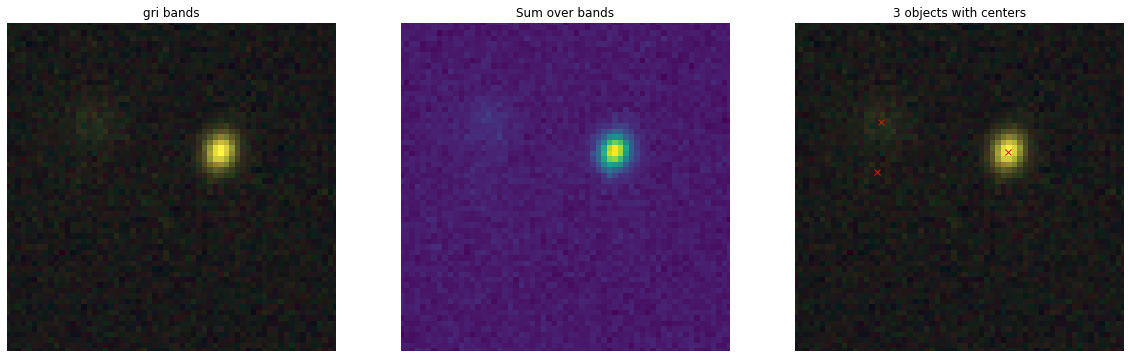

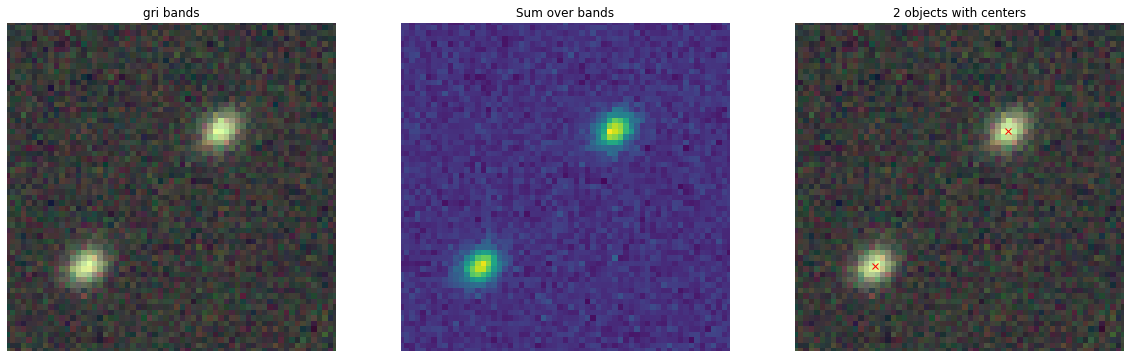

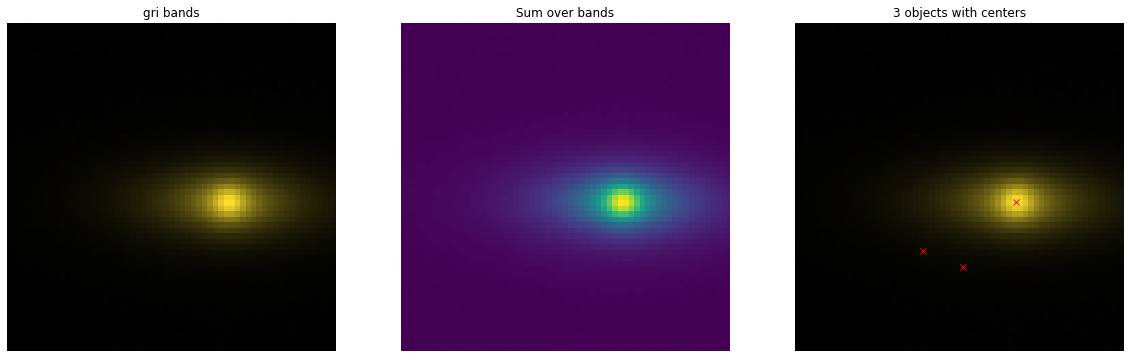

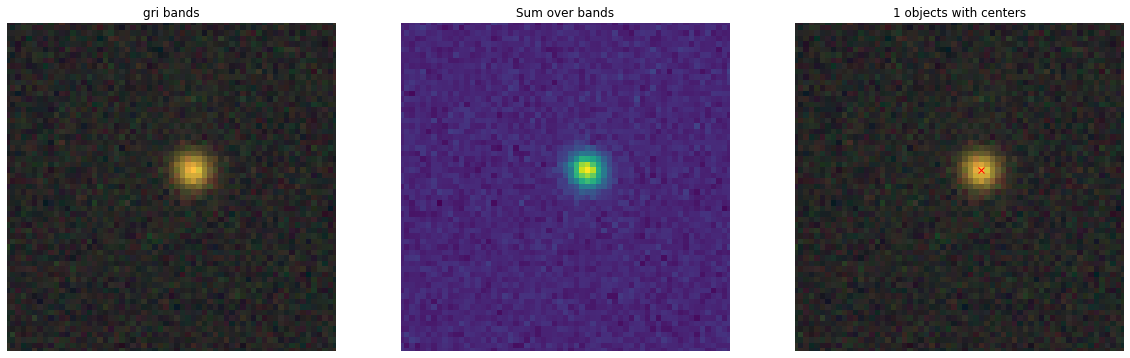

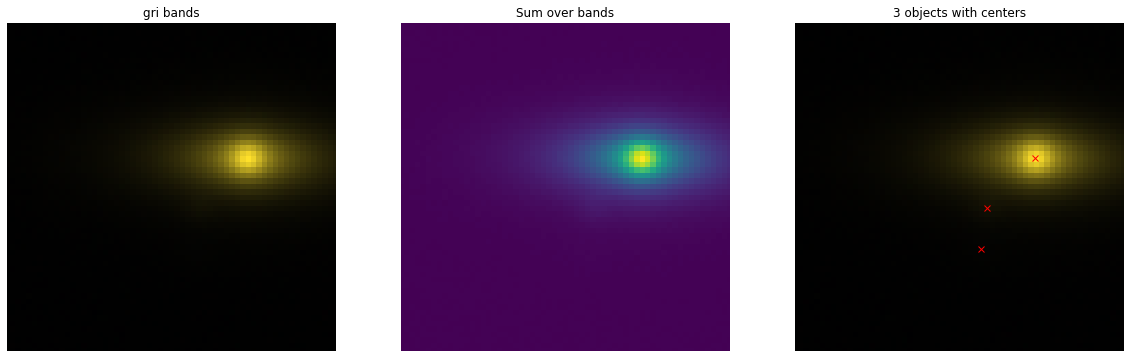

In [21]:
plot_blends(draw_generator)

We can also plot the distributions in size and magnitude of the galaxies in the batch inside BTK:

Generating blends for LSST survey:   0%|          | 0/100 [00:00<?, ?it/s]

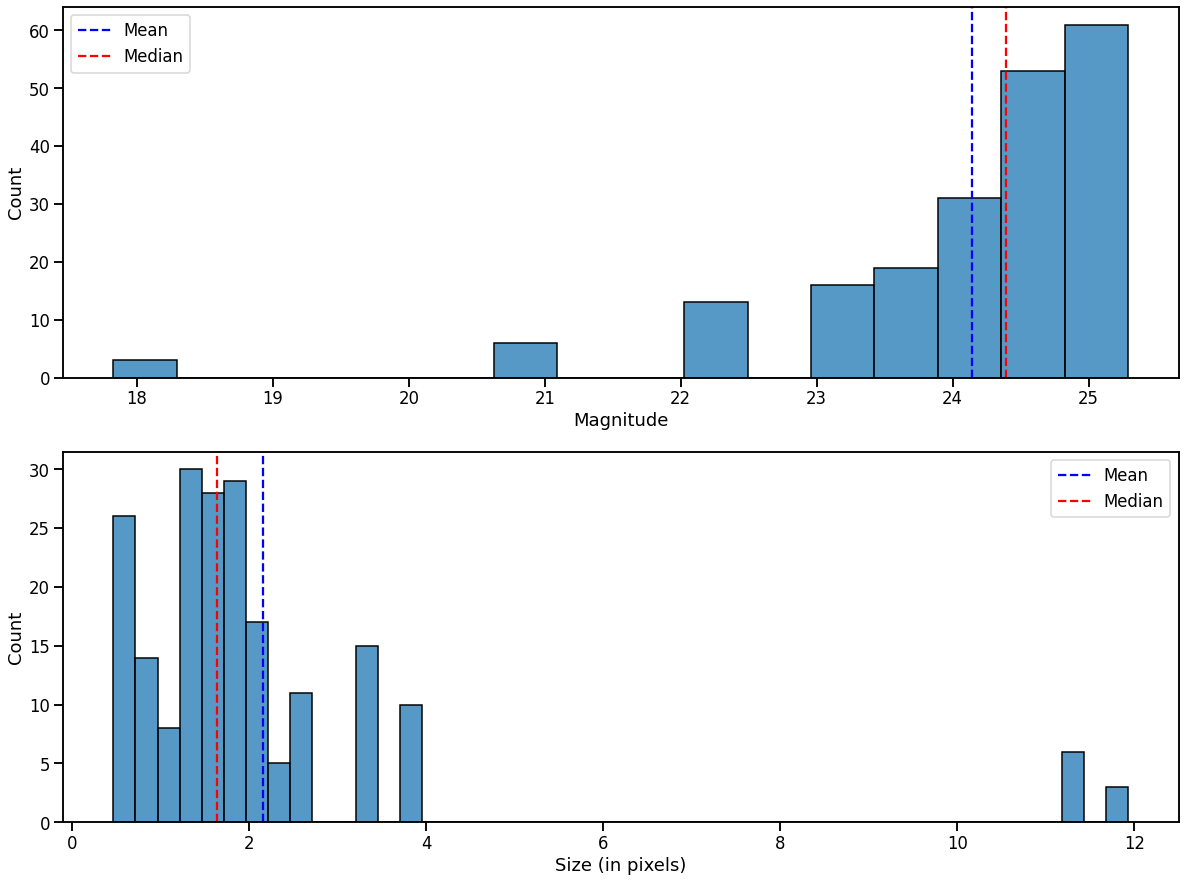

In [22]:
batch = next(draw_generator)
blend_list = batch['blend_list']
btk.plot_utils.plot_gal_parameters(blend_list)

### Exercise: Impact of sampling function and survey on blend images

For this exercise we will experiment with different sampling functions and survey parameters and see their effect in teh blend images created by the `draw_blend_generator`. 

In [ ]:
# TODO: Create a new draw_generator using the sampling function you created in the previous exercise.
simple_draw_generator = ...

In [ ]:
# TODO: Uncomment the next line once you created your draw_generator above.
# plot_blends(simple_draw_generator)

**Question:** Does the resulting images agree with what you expected your sampling function to do? 

Here is another example of a sampling function that is also available in the custom-tutorial [notebook](https://github.com/LSSTDESC/BlendingToolKit/blob/main/notebooks/02b-custom-tutorial.ipynb). You can take a look at the code below if you are interested, the main idea is that this function will return one bright centered galaxy and one dim galaxy randomly shifted.

In [ ]:
class PairSampling(btk.sampling_functions.SamplingFunction):
    
    def __init__(self, stamp_size=24.0, maxshift=None):
        super().__init__(2)
        self.stamp_size = stamp_size
        self.maxshift = maxshift if maxshift else self.stamp_size / 10.0

    @property
    def compatible_catalogs(self):
        return "CatsimCatalog", "CosmosCatalog"

    def __call__(self,table):
        number_of_objects = np.random.randint(1, self.max_number + 1)
        (q_bright,) = np.where(table["ref_mag"] <= 25.3)
        (q_dim,) = np.where((table["ref_mag"] > 25.3) & (table["ref_mag"] <= 28))
        
        indexes = [np.random.choice(q_bright),np.random.choice(q_dim)]
        blend_table = table[indexes]
        
        blend_table["ra"] = 0.0
        blend_table["dec"] = 0.0
        
        x_peak, y_peak = _get_random_center_shift(1, self.maxshift)
        
        blend_table["ra"][1] += x_peak
        blend_table["dec"][1] += y_peak

        if np.any(blend_table["ra"] > self.stamp_size / 2.0) or np.any(
            blend_table["dec"] > self.stamp_size / 2.0
        ):
            warnings.warn("Object center lies outside the stamp")
        return blend_table

In [ ]:
# TODO: Create a new draw_generator using the PairSampling function above. 
pair_draw_generator = ...

In [ ]:
# TODO: Uncomment the next line once you created your draw_generator above.
# plot_blends(pair_draw_generator)

**Question**: Does the resulting images agree with what you expected the sampling function to do? 

Finally let's experiment with changing the survey parameters.  Here is an example of creating a survey which is the same as the Rubin survey but with half the pixel scale and double sky brightness in the 'u' band.

In [ ]:
my_lsst = btk.survey.get_surveys('LSST')
my_lsst.pixel_scale = 0.1 
my_u = my_lsst.get_filter('u')
my_u.sky_brightness = my_u.sky_brightness*2

Now it's your turn to create a custom survey. (It might be easier to refer to the link [here](https://lsstdesc.org/BlendingToolKit/tutorials.html#survey) rather than scrolling back-and-forth in the notebook).

In [ ]:
# TODO: Create your own `my_Rubin` survey which is the same as `Rubin` but which 
# has 1/10th of the full_exposure_time in each band. 
# HINT: Use list comprehension over the named bands in Rubin. 


In [ ]:
# TODO: Use this survey to create a new draw_blend_generator.
custom_survey_draw_generator = ...

In [ ]:
# TODO: Uncomment the next line once you created your draw_generator above.
# plot_blends(custom_survey_draw_generator)

**Question**: Does the resulting images agree with what you expected from the changed survey parameters?

# Measurement

Now that we have some images, we can carry on with the measurements. 

What we call measurements in BTK is one of the three main targets of deblending: detections, segmentations and deblended images. You can use BTK to directly carry out the measurements on the generated data. To do this, you need to define a measure function.

The measure function is a regular function with two arguments: `batch` and `idx`. Batch is the direct output of a `DrawBlendsGenerator`, and `idx` is the index of the blend on which the measurements should be done. Here is an example of what the function looks like for `SEP` (python implementation of Source Extractor). 

In [23]:
import sep
def sep_measure(batch, idx, channels_last=False, sigma_noise=1.5, **kwargs):
    """Return detection, segmentation and deblending information with SEP.

    NOTE: This is a simplified version of the actual function that does not 
    support multi-resolution. 

    Args:
        batch (dict): Output of DrawBlendsGenerator object's `__next__` method.
        idx (int): Index number of blend scene in the batch to preform
            measurement on.
        sigma_noise (float): Sigma threshold for detection against noise.

    Returns:
        dict with the centers of sources detected by SEP detection algorithm.
    """
    channel_indx = 0 if not channels_last else -1


    image = batch["blend_images"][idx]
    coadd = np.mean(image, axis=channel_indx)
    wcs = batch["wcs"]

    stamp_size = coadd.shape[0]
    bkg = sep.Background(coadd)
    catalog, segmentation = sep.extract(
        coadd, sigma_noise, err=bkg.globalrms, segmentation_map=True
    )

    n_objects = len(catalog)

    # organizing returned images into numpy arrays
    segmentation_exp = np.zeros((n_objects, stamp_size, stamp_size), dtype=bool)
    deblended_images = np.zeros((n_objects, *image.shape), dtype=image.dtype)
    for i in range(n_objects):
        seg_i = segmentation == i + 1
        segmentation_exp[i] = seg_i
        seg_i_reshaped = np.zeros((np.min(image.shape), stamp_size, stamp_size))
        for j in range(np.min(image.shape)):
            seg_i_reshaped[j] = seg_i
        seg_i_reshaped = np.moveaxis(seg_i_reshaped, 0, np.argmin(image.shape))
        deblended_images[i] = image * seg_i_reshaped

    # translate from pixel to sky coordinates. 
    t = astropy.table.Table()
    t["ra"], t["dec"] = wcs.pixel_to_world_values(catalog["x"], catalog["y"])

    return {
        "catalog": t,
        "segmentation": segmentation_exp,
        "deblended_images": deblended_images,
    }

The function is not required to output all three measurements, only the catalog with `ra, dec` columns containing the detections is mandatory. Note that in the example above the `batch` also contains the `wcs` information so it's easy to convert between pixel and sky coordinates. 

Once the measure function is defined, it can be given to a ``MeasureGenerator`` together with the ``DrawBlendsGenerator`` from the previous step.

In [24]:
meas_generator = btk.measure.MeasureGenerator(btk.measure.sep_measure,draw_generator)

The results returned by the `MeasureGenerator`are both the results from the `DrawBlendsGenerator` and the measures, as a dictioniary with the same keys as the measure function output but containing a list with the results from all the blends.

In [25]:
blend_results,meas_results = next(meas_generator)

Generating blends for LSST survey:   0%|          | 0/100 [00:00<?, ?it/s]

You can find more on how to write your own measure function, or how to provide several measure functions at the same time in the multi tutorial [notebook](https://github.com/LSSTDESC/BlendingToolKit/blob/8624d087f155b52185946a5f990b4ebe7bcedf8a/notebooks/02a-multi-tutorial.ipynb); you will also find how to use the `measure_kwargs` feature there.

To have a comparison point for the next section, we also provide a measure function using the deblender `SCARLET` ; we can easily modify the measure generator by providing a list containing the two measure functions instead of a single measure function.

In [26]:
meas_generator = btk.measure.MeasureGenerator([btk.measure.sep_measure],draw_generator)

# Metrics

Finally, now that we have the measurements, we can compute metrics to evaluate the performance of those measurements. This is done using a `MetricsGenerator`, which takes a `MeasureGenerator` as an input, as well as a handful of parameters. 

It will match the true galaxies with the detected galaxies and compute metrics evaluating the quality of the detection (precision, recall, F1 score), the segmentation (Intersection over Union) and the reconstruction of the galaxy images (Mean Square Residual, Peak Signal to Noise Ratio, Structure Similarity Index, error on the target measures). 

You can find more details on those metrics on the [API page](https://lsstdesc.org/BlendingToolKit/src/btk.metrics.html).

In [27]:
import btk.metrics
import btk.plot_utils

metrics_generator = btk.metrics.MetricsGenerator(meas_generator,
                                                 target_meas={"ellipticity":btk.metrics.meas_ksb_ellipticity},
                                                 meas_band_name='r')
blend_results,meas_results,results = next(metrics_generator)

Generating blends for LSST survey:   0%|          | 0/100 [00:00<?, ?it/s]

Once we got the results, we can plot them using functions found in the ``plot_utils`` module. While you can access all the raw data with the keys ``"detection"``, ``"segmentation"`` and ``"reconstruction"``, you can directly access all the segmentation and reconstruction metrics with the ``"galaxy_summary"`` key, which contains an astropy Table with all galaxies from all blends and the associated parameters and metrics.

 We can use the ``plot_metrics_summary`` to easily plot the results from the metrics.

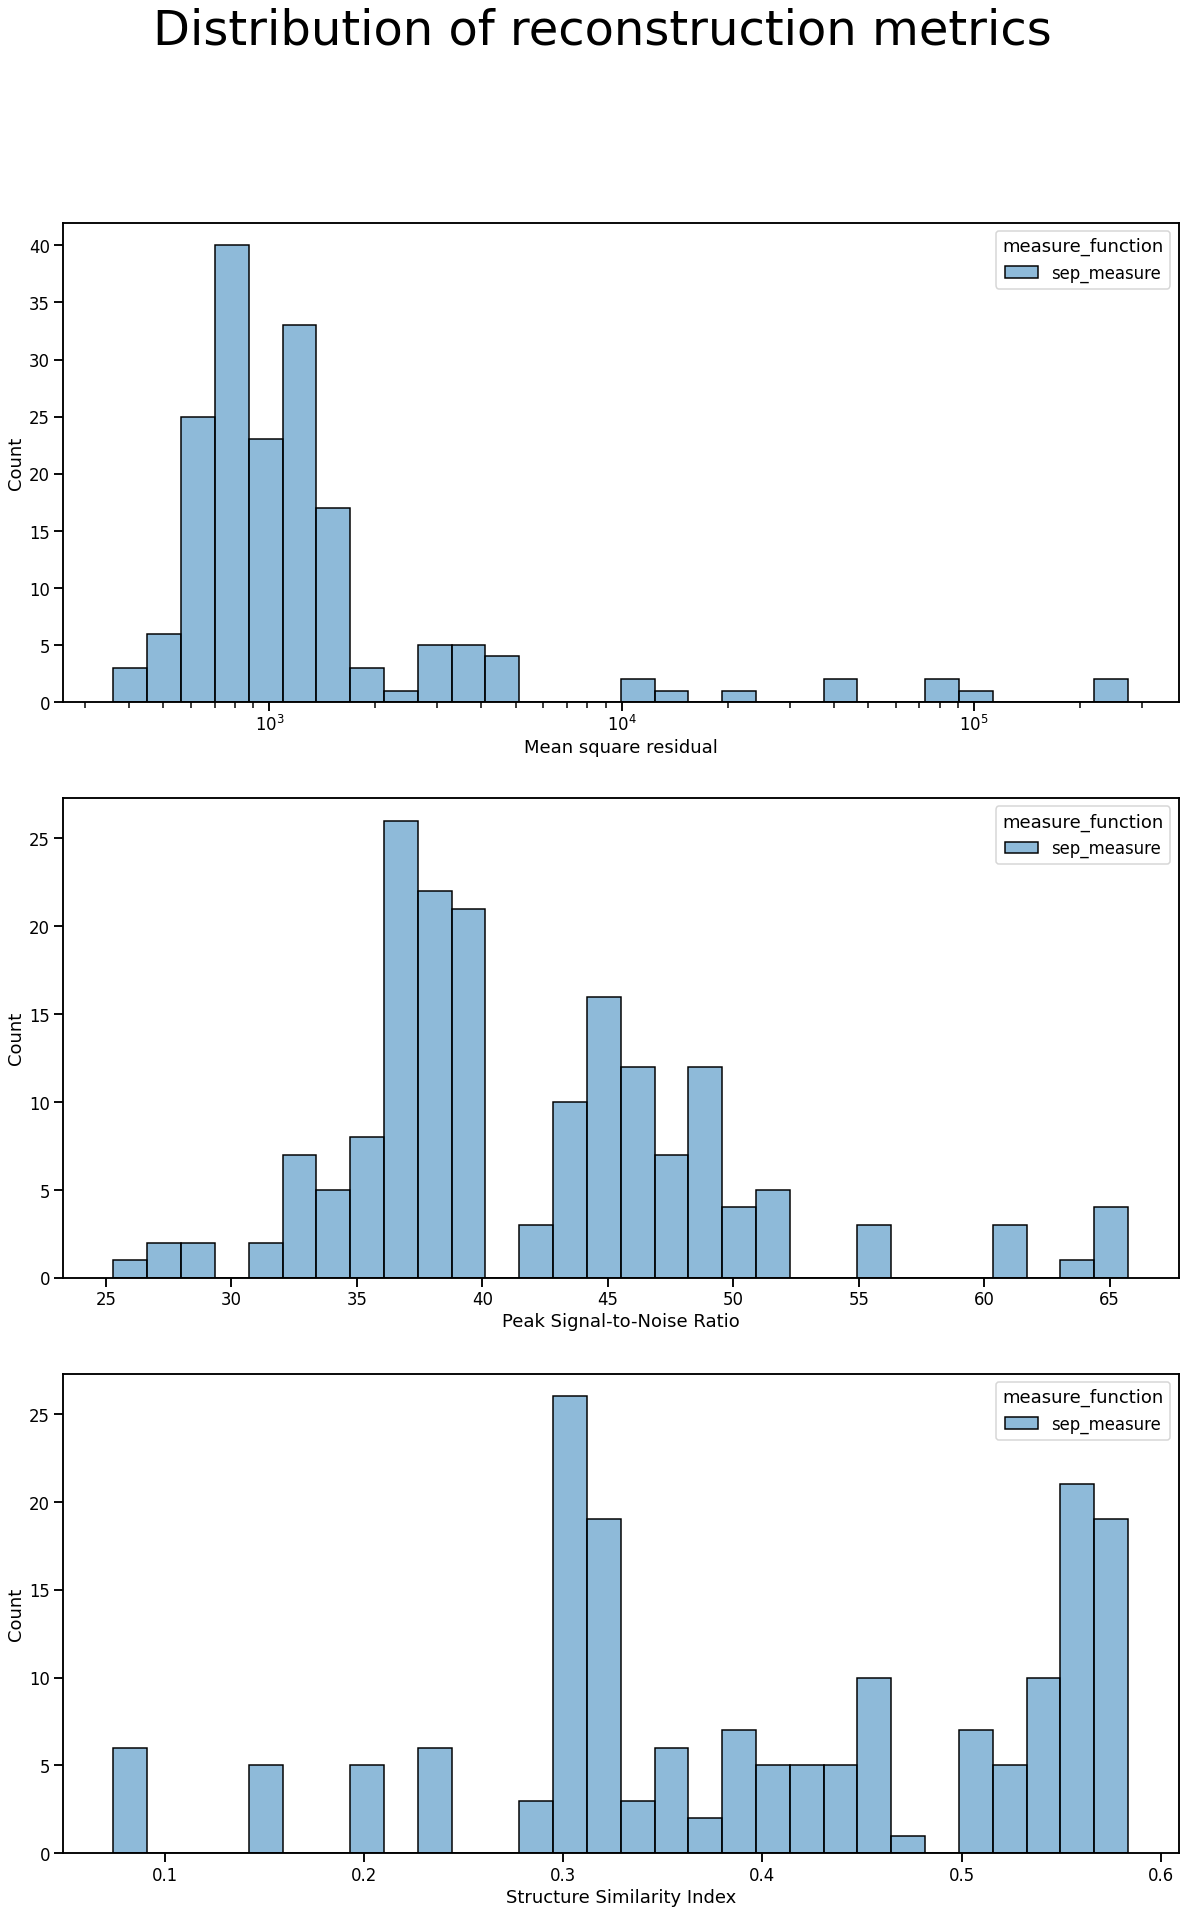

In [28]:
btk.plot_utils.plot_metrics_summary(results,interactive=True, target_meas_keys=['ellipticity0'], target_meas_limits=[(-1, 1)])

We can also use the matches from the metrics to plot the isolated galaxy images along with the matching deblended galaxies:

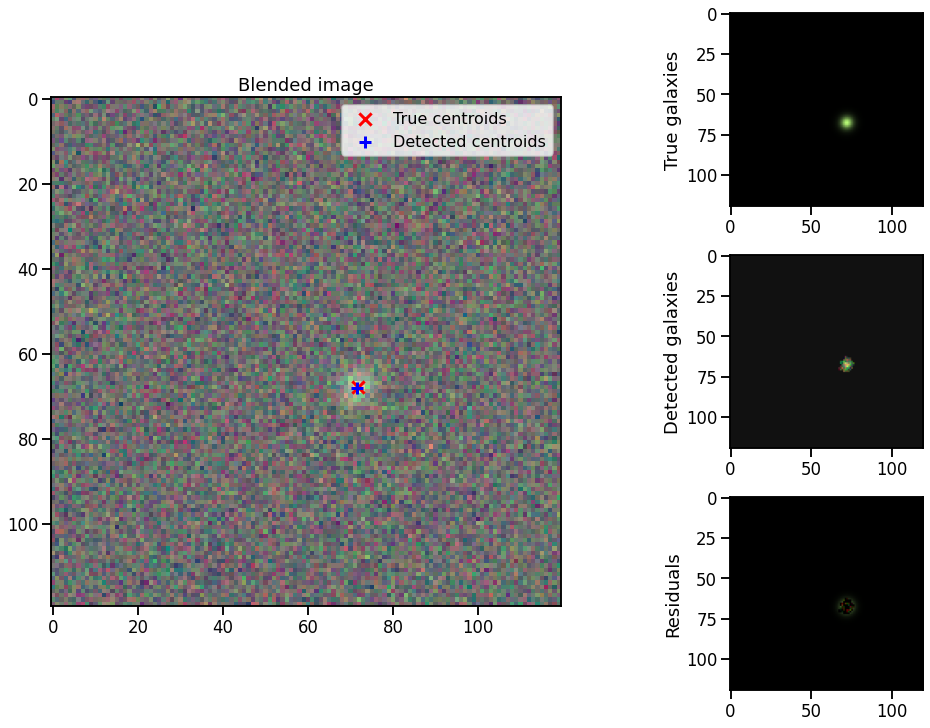

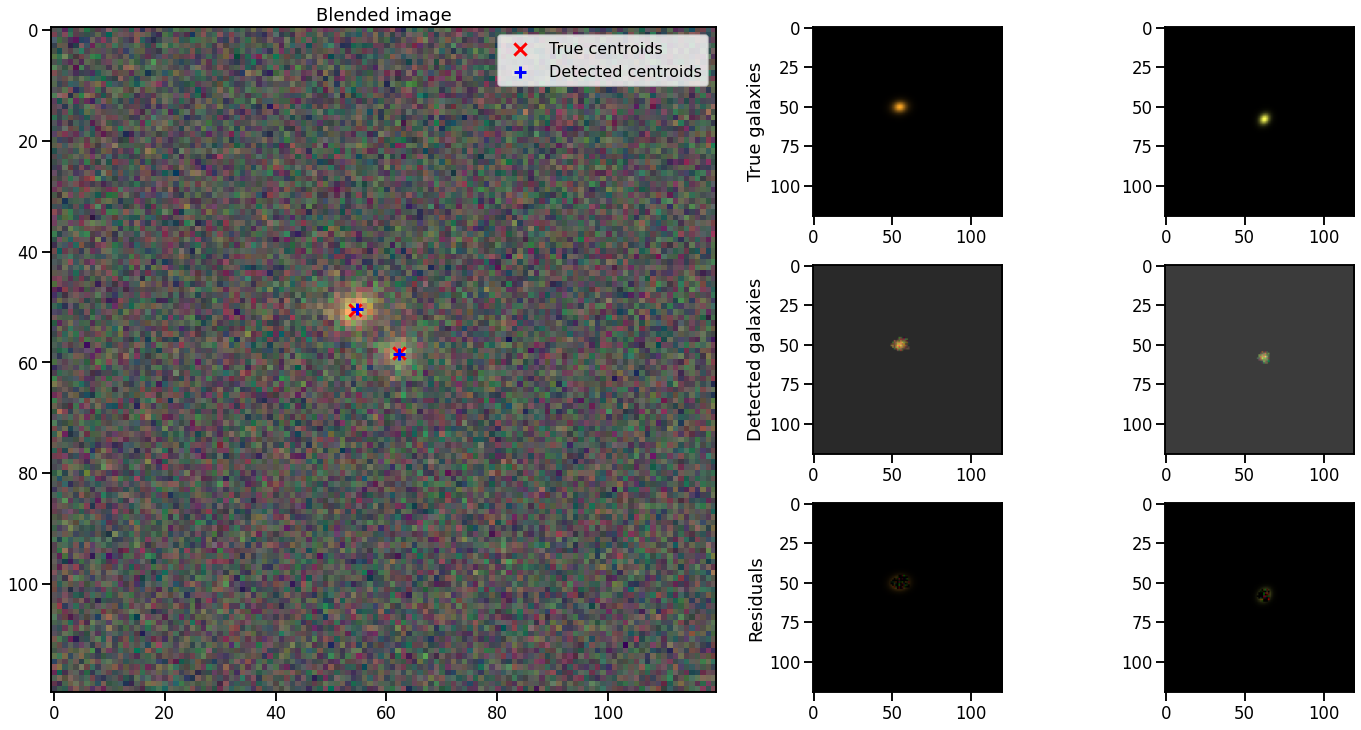

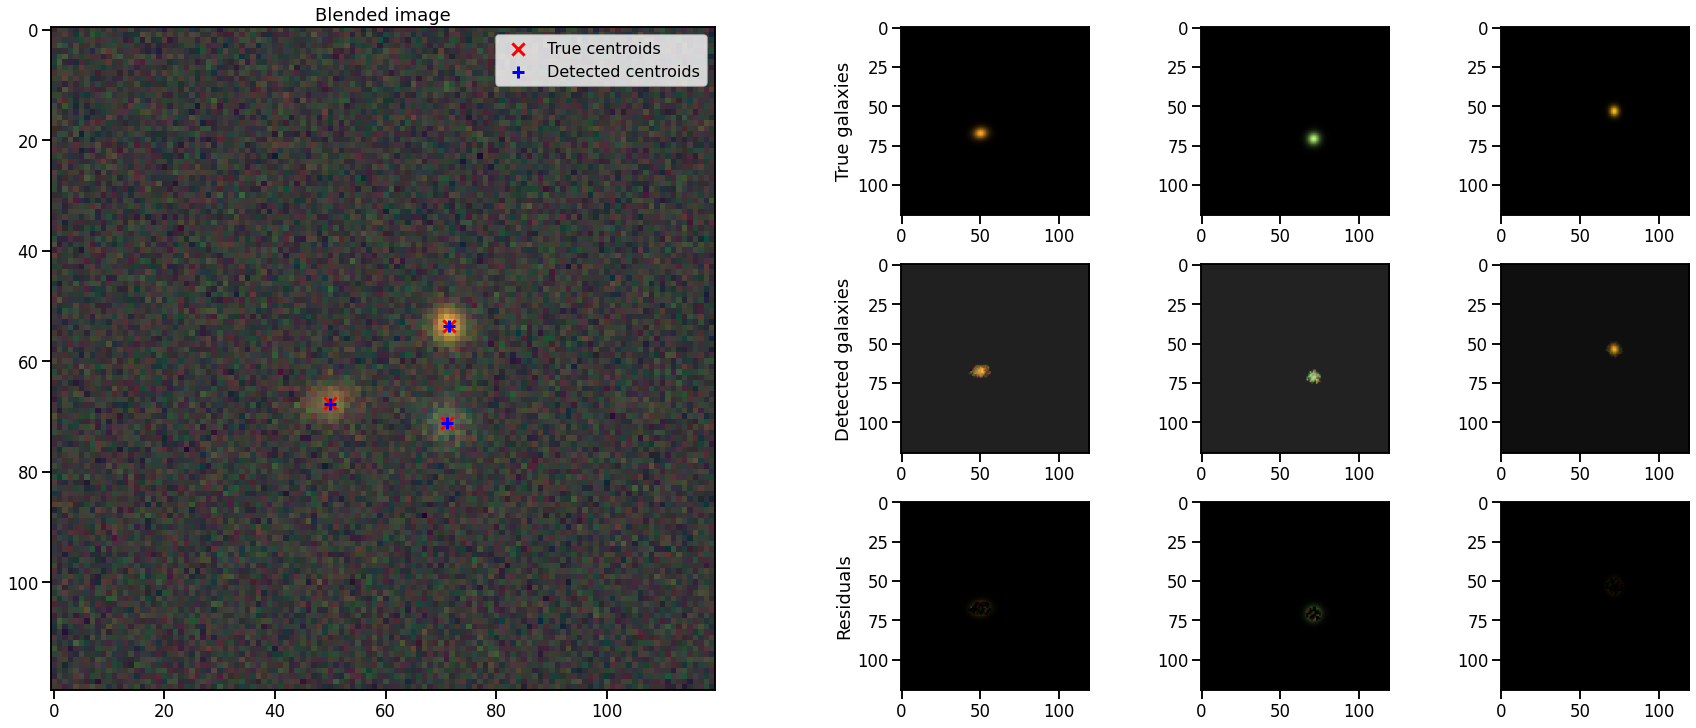

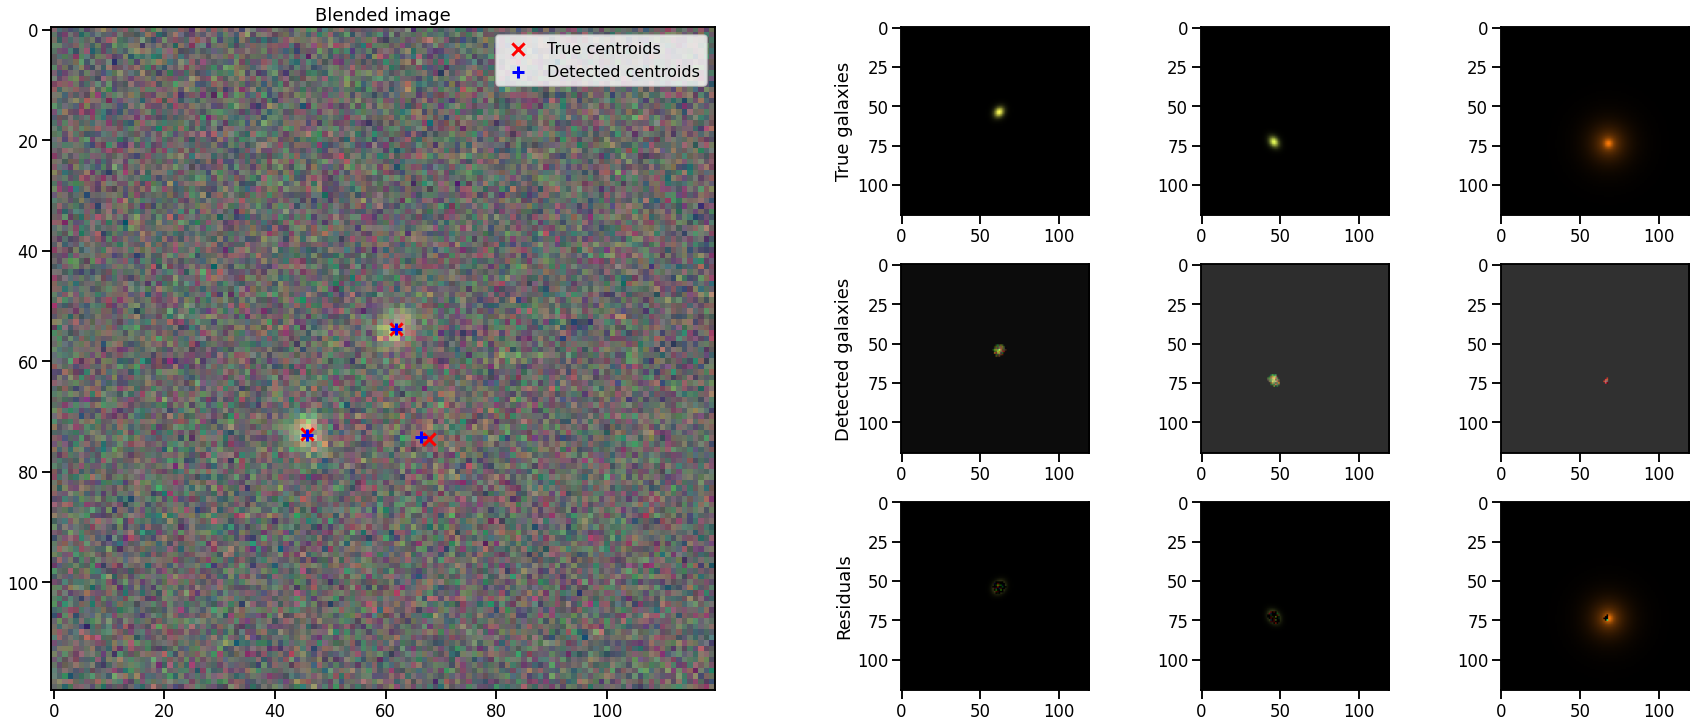

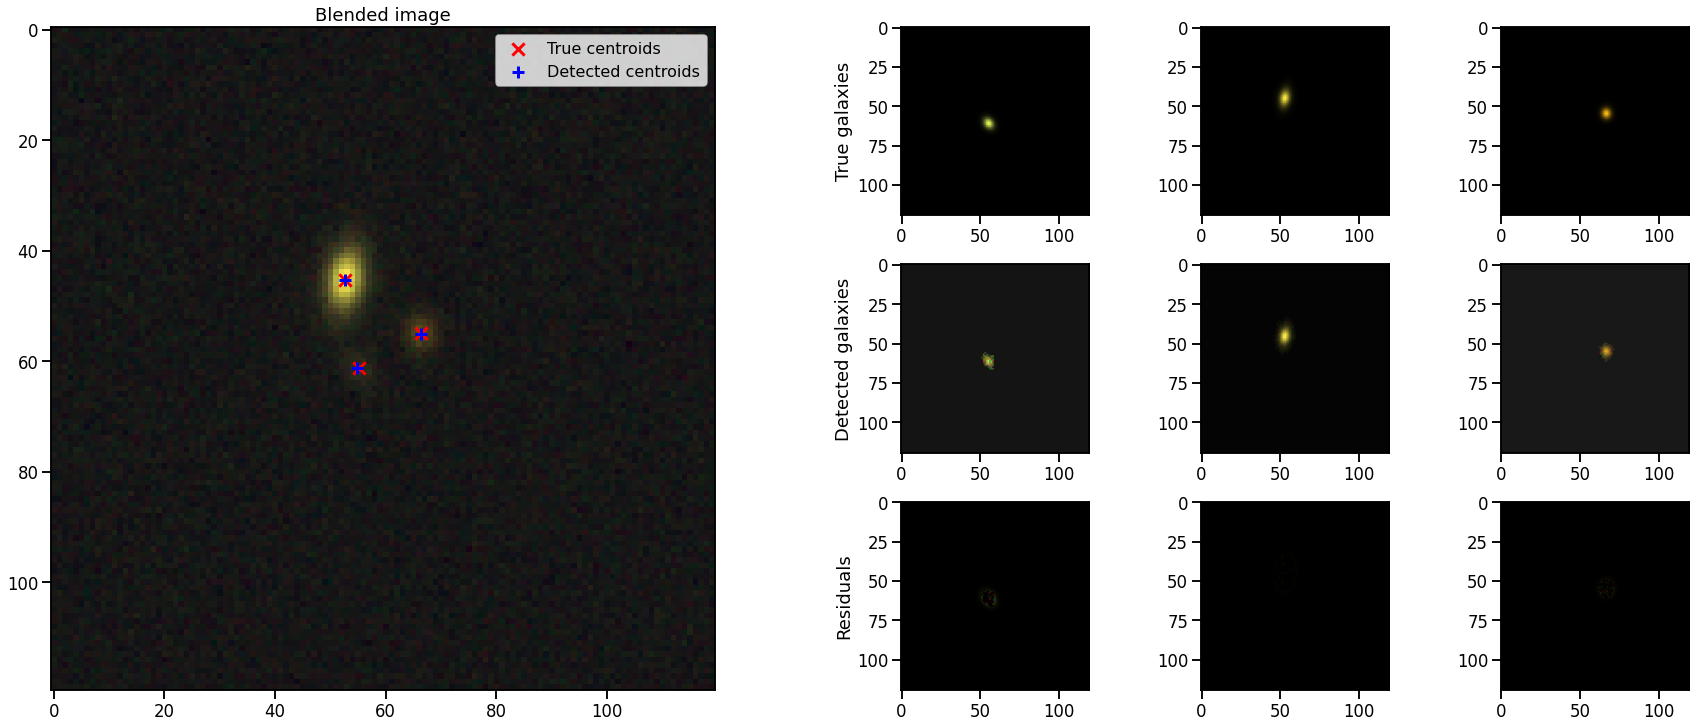

In [29]:
btk.plot_utils.plot_with_deblended(
    blend_results["blend_images"],
    blend_results["isolated_images"],
    blend_results["blend_list"],
    meas_results["catalog"]["sep_measure"],
    meas_results["deblended_images"]["sep_measure"],
    results["matches"]["sep_measure"],
    indexes=list(range(5)),
    band_indices=[1, 2, 3]
)